In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_res = pd.read_csv('/home/kurfurst/Documents/projects/mv/aurora/paper/mi/secstructLib_10min_20uM_MI.tsv', sep='\t')


In [3]:
# Adjusting results format to fit visualisation

#selected_positions = [x for x in range(1, 11)] + [x for x in range(43, 80)]

# reindex to position names (1-based)
#df_res.index = [x for x in range(1, len(df_res) + 1)]
#df_res.columns = [x for x in range(1, len(df_res.columns) + 1)]

# Extracting positions
#df_res = df_res.loc[selected_positions, selected_positions]
#df_res = df_res[df_res.columns[::-1]]

df_res.index = [x for x in range(1, len(df_res) + 1)]

df_res = df_res[df_res.columns[::-1]]


# Making a mask
mask = np.zeros_like(df_res)
mask[np.triu_indices_from(mask)] = True
mask = mask.transpose()
mask = np.flip(mask, 1)

In [41]:
df_test = pd.DataFrame([
    [0.1, 0.2, 0.9],
    [0.2, 0.3, 0.01],
    [0.8, 0.3, 0.08]
])

In [42]:
df_test

,0,1,2
0,0.1,0.2,0.90
1,0.2,0.3,0.01
2,0.8,0.3,0.08


In [43]:
k=0.01
df_scale = k/df_test

In [44]:
df_test = df_test + df_scale

In [45]:
df_test

,0,1,2
0,0.2000,0.250000,0.911111
1,0.2500,0.333333,1.010000
2,0.8125,0.333333,0.205000


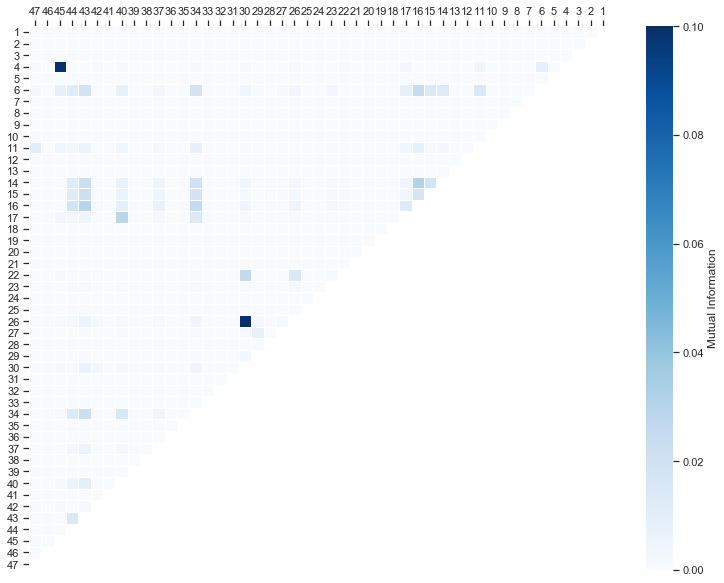

In [49]:
sns.set(rc={"figure.figsize":(13, 10)})
sns.set_style('white')
ax = sns.heatmap(df_res, linewidths=.5, mask=mask, linecolor='white', cmap='Blues', cbar_kws={'label': 'Mutual Information'}, vmin=0, vmax=0.1)
ax.xaxis.tick_top()
ax.yaxis.tick_left()
plt.show()

---

In [ ]:
res = np.array(df_res).flatten()
res.sort()
res = res[::-1]

In [ ]:
top_threshold = 1
#hm_filename = 'secstructLib_100sec_100uM_MI.png' + str(top_threshold*100) + 'perc.png'
hm_filename = 'secstructLib_100sec_100uM_MI.png'

t1 = res[int(np.ceil(((len(df_res)**2) / 2) * top_threshold))]

# Making thresholds
#df_vis = df_res.where(df_res > t1, 0)

sns.set(rc={"figure.figsize":(13, 10)})
sns.set_style('white')
ax = sns.heatmap(df_vis, linewidths=.5, mask=mask, linecolor='white', cmap='Blues', cbar_kws={'label': 'Mutual Information'})
ax.xaxis.tick_top()
ax.yaxis.tick_left()
plt.savefig(hm_filename, dpi=180)